#Reading Samples

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


we have 3 different data bases with different labeling, the first objective is to integrate them all into three dataframe called, Walden, Voiced, and SVD.

In [2]:
import os
from scipy.io import wavfile
import pandas as pd
import numpy as np
import seaborn as sns
import math
import re


##SVD

### labels

In [20]:
path=r"/content/drive/MyDrive/SONAR/Database/SVD (Saarbrücken) samples"

In [23]:
folder_conts=os.listdir(path)

In [24]:
conts=[ i for i in folder_conts if not(i.endswith(".zip"))]

In [37]:
conts

['Saarbrücken SVD healthy',
 'Saarbrücken SVD pathological',
 'Saarbrücken SVD key.xlsx']

In [38]:
healthy_IDs=os.listdir(os.path.join(path,conts[0]))

In [39]:
len(healthy_IDs)

687

In [29]:
pathological_IDs=os.listdir(os.path.join(path,conts[1]))

In [41]:
pathological_IDs

['2005-a_n.wav',
 '1415-a_n.wav',
 '1824-a_n.wav',
 '1642-a_n.wav',
 '1545-a_n.wav',
 '1714-a_n.wav',
 '1779-a_n.wav',
 '2426-a_n.wav',
 '1633-a_n.wav',
 '1416-a_n.wav',
 '1389-a_n.wav',
 '2477-a_n.wav',
 '2016-a_n.wav',
 '1552-a_n.wav',
 '2087-a_n.wav',
 '1984-a_n.wav',
 '1798-a_n.wav',
 '1827-a_n.wav',
 '1935-a_n.wav',
 '2411-a_n.wav',
 '1801-a_n.wav',
 '1485-a_n.wav',
 '2588-a_n.wav',
 '1622-a_n.wav',
 '1899-a_n.wav',
 '1680-a_n.wav',
 '1751-a_n.wav',
 '1957-a_n.wav',
 '1609-a_n.wav',
 '1685-a_n.wav',
 '1455-a_n.wav',
 '1719-a_n.wav',
 '1750-a_n.wav',
 '1764-a_n.wav',
 '2366-a_n.wav',
 '2117-a_n.wav',
 '1768-a_n.wav',
 '1639-a_n.wav',
 '1458-a_n.wav',
 '1718-a_n.wav',
 '2119-a_n.wav',
 '1688-a_n.wav',
 '2019-a_n.wav',
 '2066-a_n.wav',
 '1627-a_n.wav',
 '1966-a_n.wav',
 '1396-a_n.wav',
 '1589-a_n.wav',
 '1502-a_n.wav',
 '1936-a_n.wav',
 '1611-a_n.wav',
 '1441-a_n.wav',
 '2106-a_n.wav',
 '2000-a_n.wav',
 '1576-a_n.wav',
 '1977-a_n.wav',
 '729-a_n.wav',
 '1318-a_n.wav',
 '932-a_n.wav',

In [42]:
len(pathological_IDs)

1354

In [25]:
data1=pd.read_excel(os.path.join(path,conts[2]))

In [27]:
data1=data1.loc[data1["Pathologies"].astype("str")!="nan",["ID","Pathologies"]]
data1

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties
2220,2610,Laryngitis


In [ ]:
from typing_extensions import Literal
# @title ID

from matplotlib import pyplot as plt
bin_width = 50  # Example bin width
min_value = 0
max_value = max(data['ID'].values.max(), h.values.max())
bins = np.arange(min_value, max_value + bin_width, bin_width)

h=pd.DataFrame(np.array([int(i[:-8]) for i in healthy_IDs]))
ax=plt.gca()
ax.hist(data["ID"],label="Pathological IDs",bins=bins)
ax.hist(h,label="Healthy IDs",alpha=0.6,bins=bins)
plt.title('Histogram of Pathological and Healthy IDs')
plt.xlabel('ID number')
plt.ylabel('frequency')
plt.legend()
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.show()

NameError: name 'h' is not defined

In [30]:
pattern=re.compile(r"(\d+)(-.+)")
pathological_data=data1[data1["ID"].astype("str").apply(lambda x: x in [pattern.sub(r"\1",i) for i in pathological_IDs] )]

In [31]:
pathological_data

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2216,2606,Hypofunktionelle Dysphonie
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties


## renaming labels

In [10]:
labeling=pd.read_excel("/content/drive/MyDrive/SONAR/Database/Labels.xlsx")
labeling=labeling[labeling["Database"].apply(lambda x: "SVD" in x)]
labeling["Original Label"]=labeling["Original Label"].apply(lambda x: x.split("(")[0].strip().lower())
labeling=labeling[["Label","Original Label"]]
labeling={j:i for i,j in labeling.values}
labeling.update({"dysodie":"Dysodie"})
labeling.update({'laryngitis, leukoplakie':"Laryngitis,Leukoplakia"})
labeling.update({'balbuties':'Bulbar Paralysis'})

In [32]:
top_pathologies = data1.loc[data1['Pathologies'].apply(lambda x:len(x.split(","))==1),"Pathologies"].value_counts().head(17)

In [33]:
labeling

{'funktionelle dysphonie': 'Functional Dysphonia',
 'mutatio': 'Mutation',
 'mutationsfistelstimme': 'Mutational Fistula Voice',
 'juvenile dysphonie': 'Juvenile Dysphonia',
 'phonasthenie': 'Phonasthenia',
 'diplophonie': 'Diplophonia',
 'hypofunktionelle dysphonie': 'Hypofunctional Dysphonia',
 'hypotone dysphonie': 'Hypotonic Dysphonia',
 'vox senilis': 'Senile Voice',
 'dysphonie': 'Dysphonia',
 'laryngitis': 'Laryngitis',
 'monochorditis': 'Monochorditis',
 'gerd': 'Gastroesophageal Reflux Disease',
 'kontaktpachydermie': 'Contact Pachydermia',
 'granulom': 'Granuloma',
 'taschenfaltenstimme': 'Supraglottic Voice',
 'hyperasthenie': 'Hyperasthenia',
 'hyperfunktionelle dysphonie': 'Hyperfunctional dysphonia',
 'phonationskn�tchen': 'Phonation Nodules',
 'stimmlippenpolyp': 'Vocal Cord Polyp',
 'reinke �dem': "Reinke's Edema",
 'amyotrophe lateralsklerose': 'Amyotrophic Lateral Sclerosis',
 'zentral-laryngale bewegungsstörung': 'Central Laryngeal Kinematic Disorder',
 'spasmodische

In [34]:
new=[labeling[i.lower()] for i in top_pathologies.index if len(i.split(","))==1]

In [35]:
top_pathologies

Pathologies
Rekurrensparese                 197
Hyperfunktionelle Dysphonie     143
Laryngitis                       82
Funktionelle Dysphonie           75
Dysphonie                        70
Spasmodische Dysphonie           62
Psychogene Dysphonie             51
Chordektomie                     40
Reinke �dem                      34
Kontaktpachydermie               32
Frontolaterale Teilresektion     29
Dysodie                          28
Stimmlippenpolyp                 27
Vox senilis                      23
Stimmlippenkarzinom              20
Balbuties                        18
Leukoplakie                      15
Name: count, dtype: int64

In [36]:
top_pathologies=pd.DataFrame(top_pathologies.values,new, columns=["frequency"])
top_pathologies.to_csv("top_pathologies.csv")

In [55]:
top_pathologies.index,top_pathologies.values.reshape(-1)

(Index(['Recurrent Laryngeal Nerve Paralysis', 'Hyperfunctional dysphonia',
        'Laryngitis', 'Functional Dysphonia', 'Dysphonia',
        'Spasmodic Dysphonia', 'Psychogenic Dysphonia', 'Chordecomy',
        'Reinke's Edema', 'Contact Pachydermia',
        'Frontolateral Partial Resection', 'Dysodie', 'Vocal Cord Polyp',
        'Senile Voice', 'Vocal Cord Carcinoma', 'Bulbar Paralysis',
        'Leukoplakia'],
       dtype='object'),
 array([197, 143,  82,  75,  70,  62,  51,  40,  34,  32,  29,  28,  27,
         23,  20,  18,  15]))

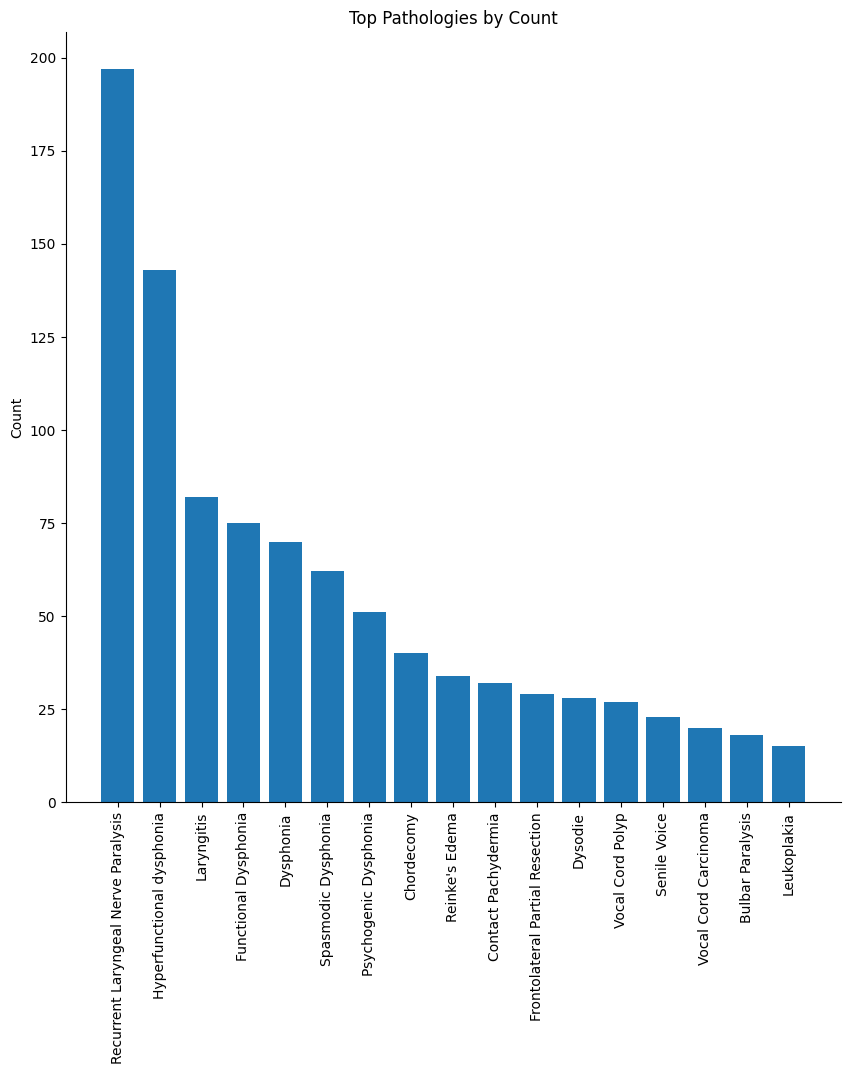

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the pathologies

# Get the top 30 pathologies and their counts

top_pathologies=pd.DataFrame(top_pathologies.values,new)
# Create a figure
plt.figure(figsize=(10,10))

# Plot the bar chart
plt.bar(top_pathologies.index,top_pathologies.values.reshape(-1))
#top_pathologies.plot(kind='bar',label="Count")
# Customizing the plot
plt.title('Top Pathologies by Count')

plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.gca().spines[['top', 'right']].set_visible(False)  # Optional: Hide the top and right spines

# Show the plot
  # Adjust layout to fit labels
plt.show()

In [57]:
data["Pathologies"].value_counts().head(30)

Pathologies
Rekurrensparese                                      197
Hyperfunktionelle Dysphonie                          143
Laryngitis                                            82
Funktionelle Dysphonie                                75
Dysphonie                                             70
Spasmodische Dysphonie                                62
Psychogene Dysphonie                                  51
Chordektomie                                          40
Reinke �dem                                           34
Kontaktpachydermie                                    32
Frontolaterale Teilresektion                          29
Dysodie                                               28
Stimmlippenpolyp                                      27
Vox senilis                                           23
Laryngitis, Leukoplakie                               21
Stimmlippenkarzinom                                   20
Balbuties                                             18
Hyperfunktionelle D

## Preprocessing Audio files

In [ ]:
path=r"/content/drive/MyDrive/SONAR/Database/SVD (Saarbrücken) samples"

In [ ]:
conts=[i for i in os.listdir(path) if not(i.endswith(r".zip") or i.endswith(".xlsx"))]
conts

['Saarbrücken SVD healthy', 'Saarbrücken SVD pathological']

In [ ]:
conts

['Saarbrücken SVD healthy', 'Saarbrücken SVD pathological']

In [ ]:
pathological_data

,ID,Pathologies
1,1862,Funktionelle Dysphonie
52,1645,Funktionelle Dysphonie
69,127,"Dysodie, Hyperfunktionelle Dysphonie"
70,567,Dysodie
77,148,Vox senilis
...,...,...
2216,2606,Hypofunktionelle Dysphonie
2217,2607,Dysphonie
2218,2608,Dysphonie
2219,2609,Balbuties


In [ ]:
wavfiles_p=[]
sr_p=[]
labels_p=[]
IDs=[]
for i in pathological_data.values:
    IDs.append([m for m in os.listdir(os.path.join(path,conts[1])) if re.search(str(i[0]),m)][0])
    sr_,wav_=wavfile.read(os.path.join(path,conts[1],IDs[-1]))
    wavfiles_p.append(wav_)
    sr_p.append(sr_)
    labels_p.append(i[-1])

In [ ]:
conts

In [ ]:
wavfiles_h=[]
sr_h=[]
labels_h=[]
path_h=os.path.join(path,conts[0])
for i in healthy_IDs:
  IDs.append(i)
  sr_,wav_=wavfile.read(os.path.join(path_h,IDs[-1]))
  wavfiles_h.append(wav_)
  sr_h.append(sr_)
  labels_h.append("Healthy")

In [ ]:
len(wavfiles_h),len(healthy_IDs)

(687, 687)

In [ ]:
wavfiles=[]
sr=[]
labels=[]
wavfiles.extend(wavfiles_p)
sr.extend(sr_p)
labels.extend(labels_p)

In [ ]:
wavfiles.extend(wavfiles_h)
sr.extend(sr_h)
labels.extend(labels_h)

In [ ]:
len(wavfiles),len(labels),len(sr),len(IDs)

(2041, 2041, 2041, 2041)

In [ ]:
alldata=[[i,j,s,I] for i,j,s,I in zip(sr,wavfiles,labels,IDs) if len(j)>50000*0.7]

In [ ]:
SVD=[[alldata[i][2],alldata[i][3],alldata[i][1].astype("int")] for i,_ in enumerate(alldata)]

In [ ]:
SVD

[['Funktionelle Dysphonie',
  '1862-a_n.wav',
  array([-321, -444, -459, ..., 8984, 9179, 9341])],
 ['Funktionelle Dysphonie',
  '1645-a_n.wav',
  array([ -339, -2498, -4579, ...,   458,   692,   987])],
 ['Dysodie, Hyperfunktionelle Dysphonie',
  '1276-a_n.wav',
  array([ -267,  -173,   -89, ..., -3133, -2914, -2620])],
 ['Dysodie', '567-a_n.wav', array([8718, 8708, 8834, ..., 1927, 2037, 2127])],
 ['Vox senilis',
  '1485-a_n.wav',
  array([-6991, -6583, -6273, ...,  2146,  2254,  2427])],
 ['Rekurrensparese',
  '929-a_n.wav',
  array([2937, 3760, 4480, ...,  -30,  -24, -115])],
 ['Psychogene Dysphonie',
  '151-a_n.wav',
  array([ 4957,  5038,  5076, ..., -1183, -1397, -1649])],
 ['Hyperfunktionelle Dysphonie, Psychogene Dysphonie',
  '1335-a_n.wav',
  array([ 9127, 10337, 11287, ...,  9637,  9830, 10109])],
 ['Hyperfunktionelle Dysphonie',
  '2355-a_n.wav',
  array([-7622, -9070, -9717, ...,  -241,   634,  1557])],
 ['Hyperfunktionelle Dysphonie',
  '890-a_n.wav',
  array([-17831, -2

## saving SVD database

In [ ]:
import h5py
import json
hdf5_file_path="/content/drive/MyDrive/hdf5_SVD_with_IDs.h5"
with h5py.File(hdf5_file_path,"w") as f:
  for i,(name,id,data) in enumerate(SVD):
    grp=f.create_group(f"dataset_{i}")
    grp.attrs["name"]=name
    grp.attrs["ID"]=id
    data_json=json.dumps([int(i) for i in data])
    grp.create_dataset("signal",data=data_json.encode("utf-8"))

##reading dataset

In [3]:
import h5py
import json
import numpy as np
from IPython.display import clear_output
name,data,ID_N=[],[],[]
hdf5_file_path="/content/drive/MyDrive/hdf5_SVD_with_IDs.h5"
m=0
percent="["
percent+=" "*100
percent+="]"
with h5py.File(hdf5_file_path,"r") as f:
  a=len(f.keys())
  t=[[m,i] for m,i in zip(range(1,a,int(a/100)),range(1,100))]
  for i,key in enumerate(f.keys()):
    grp=f[key]
    name.append(grp.attrs["name"])
    ID_N.append(grp.attrs["ID"])
    signal_jason=grp["signal"][()].decode("utf-8")
    signal=json.loads(signal_jason)
    data.append(np.array(signal))

    if m<len(t) and i==t[m][0]:
      clear_output(wait=True)
      m+=1
      percent=percent[0:m]+"."+percent[m+1:]
      print(f"{t[m-1][1]} percent completed")
      print(percent)



99 percent completed
[................................................................................................... ]


In [4]:
len(data)

1824

In [4]:
!pip install openl3

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openl3: filename=openl3-0.4.2-py2.py3-none-any.whl size=249327032 sha256=891deca1a926eba0485a42666f97be00600619d6f7ad2dbc8444a4e219b43246
  Stored in directory: /root/.cache/pip/wheels/d0/4d/0a/e57b1dc8ead91b3c5709d9de4f02d1cdd3a91f609a8f1c1062
  Created wheel for kapre: filename=kapre-0.3.7-py3-none-any.whl size=29603 sha256=cdbd15dc06be089157a30b926bf3b587b6eaae4fc7b30b113ebdbf085291a254
  Stored in directory: /root/.cache/pip/wheels/3e/54/f9/37e9f36590a5431dc207f7dc0eb2e607ff8958d5728e45ef58
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320708 sha256=38a0d1f090e5c9a0b637fedea184166e841ef03bd828059e6aaf9da169285ca6
  Stored in directory: /roo

In [5]:
import openl3

##confused data processing

In [9]:
classes=['Dysphonie', 'Funktionelle Dysphonie', 'Healthy',
       'Hyperfunktionelle Dysphonie', 'Laryngitis',
       'Psychogene Dysphonie', 'Rekurrensparese',
       'Spasmodische Dysphonie']

In [8]:
conf=pd.read_csv("confusedlabels.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'confusedlabels.csv'

In [ ]:
desired_IDs=conf["ID"].values
desired_IDs=np.unique(desired_IDs)

In [ ]:
np.array(list(map(lambda x: x in desired_IDs,ID_N)))

array([False,  True, False, ..., False, False, False])

In [ ]:
desired_IDs,len(desired_IDs)

(array(['1043-a_n.wav', '1119-a_n.wav', '1225-a_n.wav', '1233-a_n.wav',
        '1237-a_n.wav', '1276-a_n.wav', '1309-a_n.wav', '1312-a_n.wav',
        '1318-a_n.wav', '1319-a_n.wav', '1396-a_n.wav', '1425-a_n.wav',
        '1482-a_n.wav', '151-a_n.wav', '1549-a_n.wav', '1554-a_n.wav',
        '1562-a_n.wav', '1565-a_n.wav', '1567-a_n.wav', '1593-a_n.wav',
        '1594-a_n.wav', '1604-a_n.wav', '1608-a_n.wav', '1645-a_n.wav',
        '1657-a_n.wav', '1679-a_n.wav', '1680-a_n.wav', '1713-a_n.wav',
        '1742-a_n.wav', '1751-a_n.wav', '1809-a_n.wav', '1816-a_n.wav',
        '1832-a_n.wav', '1892-a_n.wav', '1955-a_n.wav', '1959-a_n.wav',
        '1982-a_n.wav', '2000-a_n.wav', '2066-a_n.wav', '2072-a_n.wav',
        '2080-a_n.wav', '2087-a_n.wav', '2105-a_n.wav', '2106-a_n.wav',
        '2186-a_n.wav', '2239-a_n.wav', '2275-a_n.wav', '2304-a_n.wav',
        '2330-a_n.wav', '2360-a_n.wav', '2374-a_n.wav', '2397-a_n.wav',
        '2417-a_n.wav', '2508-a_n.wav', '2542-a_n.wav', '2583-a_n

In [ ]:
index=np.array(list(map(lambda x: x[0] in desired_IDs and x[1] != "Healthy" and x[1] in classes,zip(ID_N,name))))
ID_conf=np.array(ID_N)[index];labels_conf=np.array(name)[index];data_conf=[data[i] for i in range(len(index)) if index[i]]

In [ ]:
len(data_conf)

65

##preprocessing samples

In [8]:
data,name,ID_N

([array([-321, -444, -459, ..., 8984, 9179, 9341]),
  array([ -339, -2498, -4579, ...,   458,   692,   987]),
  array([-13801, -13470, -12891, ...,   1008,   1373,   1634]),
  array([4065, 2950, 1750, ..., 2394, 2414, 2473]),
  array([-2422, -2577, -2656, ...,  -248,  -360,  -572]),
  array([2498, 2857, 3215, ..., 7396, 7562, 7595]),
  array([-5290, -5350, -5325, ..., -2453, -2401, -2455]),
  array([-7118, -6390, -5562, ..., -2129, -2010, -1816]),
  array([-5311, -5000, -4639, ...,  5419,  4822,  4169]),
  array([-5629, -5451, -5246, ..., -2836, -2887, -2906]),
  array([-3044, -2848, -2667, ..., -7721, -7994, -8167]),
  array([-1705, -2150, -2678, ...,  1639,  1778,  1977]),
  array([1164, 1441, 1679, ..., 1981, 2572, 3078]),
  array([13647, 14133, 14498, ...,   655,   710,   605]),
  array([ 7705,  6565,  5401, ..., -6485, -6210, -6017]),
  array([-3867, -1111,  1254, ...,  1856,  2159,  2239]),
  array([14369, 13249, 11627, ..., -8065, -7982, -7816]),
  array([ 9564, 10223, 10792, ..

In [10]:
index=list(map(lambda x: x in classes,name))
name=np.array(name)[index]
data=[data[i] for i in range(len(data)) if index[i]]

In [11]:
m=np.unique(np.array(name),return_counts=True)
list(zip(m[0],m[1]))

[('Dysphonie', 59),
 ('Funktionelle Dysphonie', 70),
 ('Healthy', 651),
 ('Hyperfunktionelle Dysphonie', 128),
 ('Laryngitis', 73),
 ('Psychogene Dysphonie', 45),
 ('Rekurrensparese', 160),
 ('Spasmodische Dysphonie', 53)]

In [11]:
len(data)

1239

In [12]:
preprocessed_audio=[openl3.core._preprocess_audio_batch(wav,50000,hop_size=0.5,center=True) for wav in data]

/usr/local/lib/python3.10/dist-packages/openl3/core.py:82: OpenL3Warning: Duration of provided audio is shorter than window size (1 second). Audio will be padded.
  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',


In [ ]:
preprocessed_audio=[openl3.core._preprocess_audio_batch(wav,50000,hop_size=0.5,center=True) for wav in data_conf]

/usr/local/lib/python3.10/dist-packages/openl3/core.py:82: OpenL3Warning: Duration of provided audio is shorter than window size (1 second). Audio will be padded.
  warnings.warn('Duration of provided audio is shorter than window size (1 second). Audio will be padded.',


In [13]:
len(preprocessed_audio)

1239

In [13]:
labels=name

In [15]:
labels=labels_conf

NameError: name 'labels_conf' is not defined

In [14]:
Audios=[]
labels_all=[]
IDs_all=[]
for i,k in enumerate(preprocessed_audio):
  for j in k:
    Audios.append(j)
    labels_all.append(labels[i])
    IDs_all.append(ID_N[i])

    #IDs_all.append(ID_conf[i])

In [17]:
len(Audios),len(labels_all),len(IDs_all)

(3953, 3953, 3953)

In [18]:
m=np.unique(np.array(labels_all),return_counts=True)
k=np.argsort(np.array(m[1]))
m=[(m[0][i],m[1][i]) for i in k]
m[::-1]

[('Healthy', 2046),
 ('Rekurrensparese', 518),
 ('Hyperfunktionelle Dysphonie', 440),
 ('Laryngitis', 226),
 ('Funktionelle Dysphonie', 221),
 ('Dysphonie', 189),
 ('Spasmodische Dysphonie', 168),
 ('Psychogene Dysphonie', 145)]

In [15]:
Audios=np.array(Audios).astype("float32")

In [16]:
Audios.shape

(3953, 1, 48000)

In [ ]:
from collections import Counter


In [17]:
Audios=Audios.astype("int")

In [18]:
l=np.unique(np.array(labels_all),return_counts=True)
k=np.array([[i,j] for i,j in zip(l[0],l[1])])
k=k[np.argsort(k[:,1].astype("int"))[-1::-1],:]

labels_1=k[k[:,1].astype("int")>100,0]


In [ ]:
np.argsort(np.unique(np.array(labels_all)))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153])

In [19]:
Audios=Audios.reshape(-1,Audios.shape[2])

In [20]:
labels_all=np.array(labels_all)
IDs_all=np.array(IDs_all)

In [21]:
indexes=[i in labels_1 for i in labels_all ]
labels_all_n=labels_all[indexes]
IDs_all_n=IDs_all[indexes]
Audios_n=Audios[indexes]

In [22]:
labels_all_n.shape,Audios_n.shape

((3953,), (3953, 48000))

In [27]:
labeling.update({"healthy":"Healthy"})

NameError: name 'labeling' is not defined

In [53]:
m=np.unique(np.array(labels_all_n),return_counts=True)
k=pd.DataFrame(np.array([[i , j] for i,j in zip(np.array([labeling[i.lower()] for i in m[0]]),m[1])]),columns=["Pathologies","Frequencies"])
k['Frequencies'] = pd.to_numeric(k['Frequencies'])
k1=k.sort_values( by="Frequencies",ascending=False )
k1

,Pathologies,Frequencies
2,Healthy,2046
6,Recurrent Laryngeal Nerve Paralysis,518
3,Hyperfunctional dysphonia,440
4,Laryngitis,226
1,Functional Dysphonia,221
0,Dysphonia,189
7,Spasmodic Dysphonia,168
5,Psychogenic Dysphonia,145


In [ ]:
k1.to_csv("Freqtable.csv")

In [ ]:
SVD.to_csv("/content/drive/MyDrive/SONAR/SVD_Hyp.csv")

##Labels

In [23]:
len(set(labels_all_n))

8

##X,y

In [24]:
#X=Audios_n
X=Audios
#y=np.array(labels_all_n)
y=np.array(labels_all)

In [25]:
X=X.reshape(X.shape[0],1,X.shape[1])
X.shape

(3953, 1, 48000)

In [ ]:
y[-1]

'Psychogene Dysphonie'

In [26]:
X.shape,y.shape

((3953, 1, 48000), (3953,))

#Loading model

In [27]:
import tensorflow as tf

In [28]:
basemodel=openl3.models.load_audio_embedding_model("mel128",embedding_size=512,content_type="music")

In [67]:
basemodel.trainable=False

In [29]:
basemodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_1 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

##mel spectrogram

In [62]:
def _log10(x):
    '''log10 tensorflow function.'''
    return tf.math.log(x) / tf.math.log(tf.constant(10, dtype=x.dtype))

def kapre_v0_1_4_magnitude_to_decibel(x, ref_value=1.0, amin=1e-10, dynamic_range=80.0):
    '''log10 tensorflow function.'''
    amin = tf.cast(amin or 1e-10, dtype=x.dtype)
    max_axis = tuple(range(K.ndim(x))[1:]) or None
    log_spec = 10. * _log10(K.maximum(x, amin))
    return K.maximum(
        log_spec - K.max(log_spec, axis=max_axis, keepdims=True),
        -dynamic_range)
from tensorflow.keras.layers import (
        Input, Conv2D, Permute, BatchNormalization, MaxPooling2D,
        Flatten, Activation, Lambda)
import tensorflow.keras.backend as K
def __fix_kapre_spec(func):
    '''Wraps the kapre composite layer interface to revert .'''
    def get_spectrogram(*a, return_decibel=False, **kw):
        seq = func(*a, return_decibel=False, **kw)
        if return_decibel:
            seq.add(Lambda(kapre_v0_1_4_magnitude_to_decibel))
        seq.add(Permute((2, 1, 3)))  # the output is (None, t, f, ch) instead of (None, f, t, ch), so gotta fix that
        return seq
    return get_spectrogram


weight_decay = 1e-5
n_dft = 2048
n_mels = 128
n_hop = 242
asr = 48000
audio_window_dur = 1

input_shape = (1, int(asr * audio_window_dur))
x_a = tf.keras.Input(shape=input_shape, dtype='float32')

# MELSPECTROGRAM PREPROCESSING
# 128 x 199 x 1
from kapre.composed import get_melspectrogram_layer
spec = __fix_kapre_spec(get_melspectrogram_layer)(
    input_shape=input_shape,
    n_fft=n_dft, hop_length=n_hop, n_mels=n_mels,
    sample_rate=asr, return_decibel=True, pad_end=True,
    input_data_format='channels_first',
    output_data_format='channels_last')
y_a = spec(x_a)


In [63]:

model1=tf.keras.Model(x_a,y_a)

In [63]:
y1=np.array([labeling[i.lower()] for i in y]).reshape(-1,1)
y=y1

In [64]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
a=model1.predict(X[1].reshape(1,1,48000))

1/1 [==============================] - 0s 20ms/step


In [43]:
X.shape

(3953, 1, 48000)

In [44]:
X[0,0,:]

array([    0,     0,     0, ..., -2175, -2497, -2595])

In [83]:
b=grad.predict(X[1].reshape(1,1,48000))

1/1 [==============================] - 1s 602ms/step


In [84]:
len(b)

8

In [82]:
y[340,0]

'Healthy'

In [88]:
a.shape

(3953, 128, 199, 1)

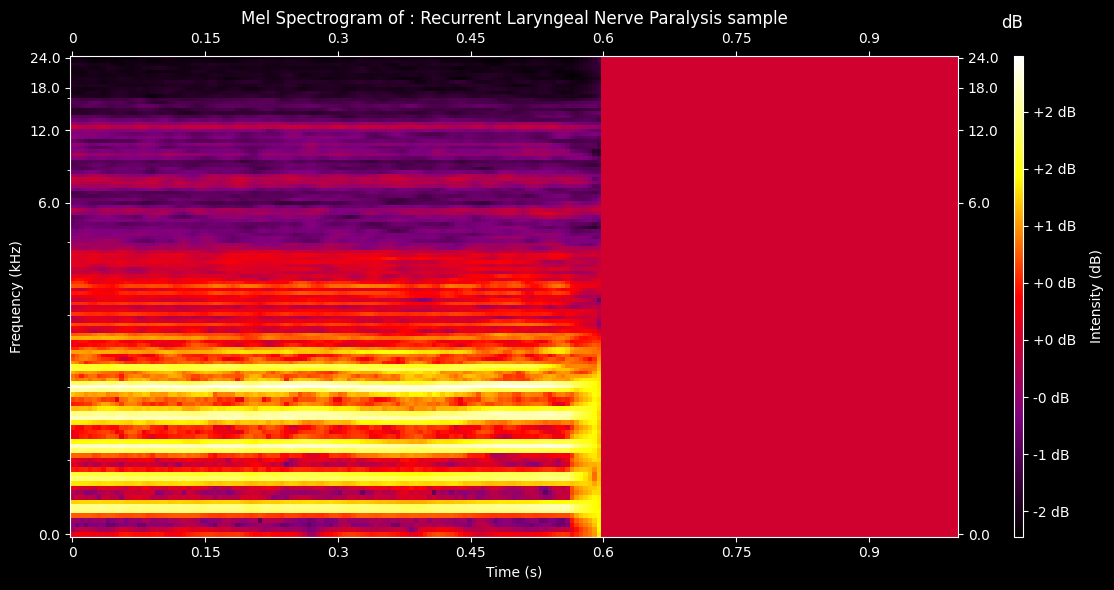

In [134]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import librosa.display
import numpy as np
from sklearn.preprocessing import StandardScaler
i=344
# Your Mel spectrogram data (replace this with your actual data array)
sc=StandardScaler()
S_dB = sc.fit_transform(a[i].reshape(-1,199))  # This should be your 128x199 array

# Sampling rate
sr = 48000  # 48 kHz

# Duration of the data
duration = 1.0  # 1 second

# Custom colormap: dark to red to white
cmap = mcolors.LinearSegmentedColormap.from_list('custom_map', ['black', 'purple', 'red', 'yellow', 'white'])

# Set up the figure and axis
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')  # Set the plot background to black

# Display the Mel spectrogram
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel',
                               fmax=sr/2, cmap=cmap, hop_length=242, vmin=S_dB.min(),vmax=S_dB.max())

# Add a color bar to the right
cbar = plt.colorbar(img, orientation='vertical', aspect=50, format='%+2.0f dB')
cbar.set_label('Intensity (dB)', labelpad=10)

# Place the description of the color bar directly under it
cbar.ax.set_title('dB', loc='right', pad=20, color='white')

# Adjust the ticks on the color bar
cbar.ax.yaxis.set_ticks_position('right')

# Customize the axes
#plt.xticks(np.linspace(0, duration, num=5))  # Time in seconds
# Frequency in kHz, correct ordering with librosa's utility
mel_frequencies = librosa.mel_frequencies(n_mels=128, fmax=sr/2)  # Convert Hz to kHz
plt.yticks(np.linspace(0, mel_frequencies.max(), num=5),
           [f'{freq:.1f}' for freq in np.linspace(0, sr/2000, num=5)])  # Display in kHz

# Add secondary x-axis (top) and y-axis (right)
plt.gca().xaxis.set_tick_params(top=True, labeltop=True)
plt.gca().yaxis.set_tick_params(right=True, labelright=True)

# Add title and labels
plt.title(f'Mel Spectrogram of : {y[i,0]} sample')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
y.shape

(2614,)

In [ ]:
a.shape

(2614, 128, 199, 1)

##heatmap

In [50]:
b.shape

(1, 128, 199, 64)

In [ ]:
sns.heatmap(b[0,:,:,3].reshape(128,199))

In [59]:
np.mean(b[0,:,:,:],axis=2).shape

(128, 199)

In [70]:
len(b)

2

<Axes: >

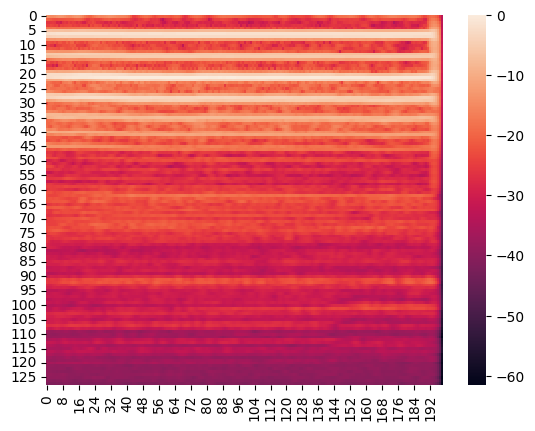

In [85]:
sns.heatmap(a.reshape(128,199))

<Axes: >

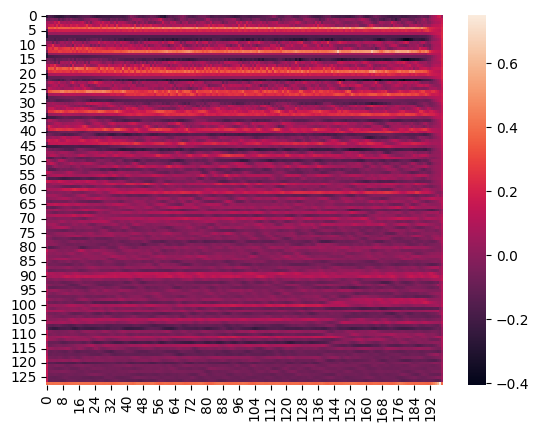

In [86]:
sns.heatmap(np.mean(b[0][0,:,:,:],axis=2).reshape(128,199))

<Axes: >

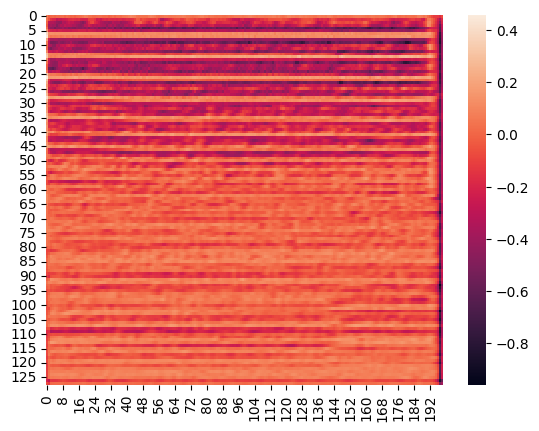

In [87]:
sns.heatmap(np.mean(b[1][0,:,:,:],axis=2).reshape(128,199))

<Axes: >

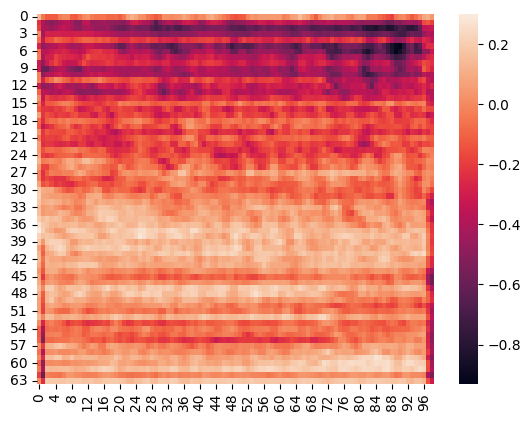

In [88]:
sns.heatmap(np.mean(b[2][0,:,:,:],axis=2).reshape(64,99))

<Axes: >

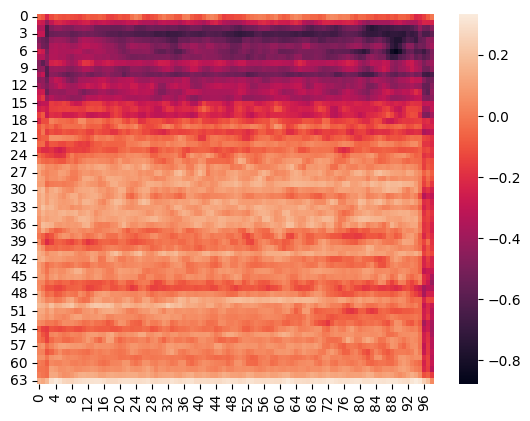

In [89]:
sns.heatmap(np.mean(b[3][0,:,:,:],axis=2).reshape(64,99))

<Axes: >

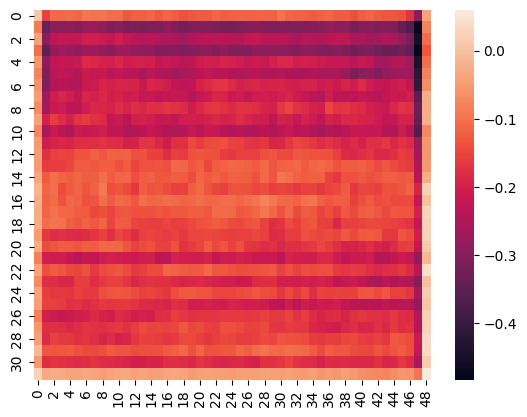

In [90]:
sns.heatmap(np.mean(b[4][0,:,:,:],axis=2).reshape(32,49))

<Axes: >

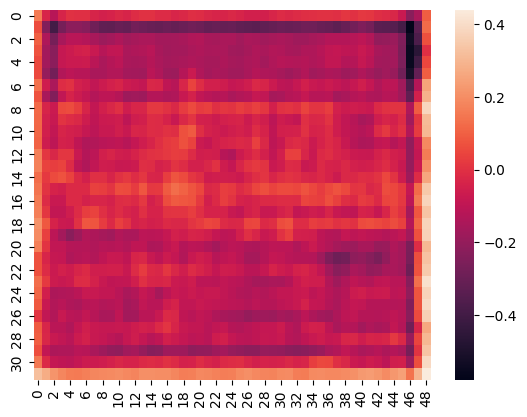

In [91]:
sns.heatmap(np.mean(b[5][0,:,:,:],axis=2).reshape(32,49))

<Axes: >

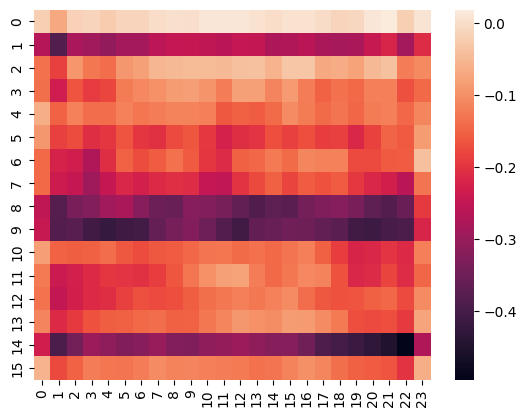

In [92]:
sns.heatmap(np.mean(b[6][0,:,:,:],axis=2).reshape(16,24))

<Axes: >

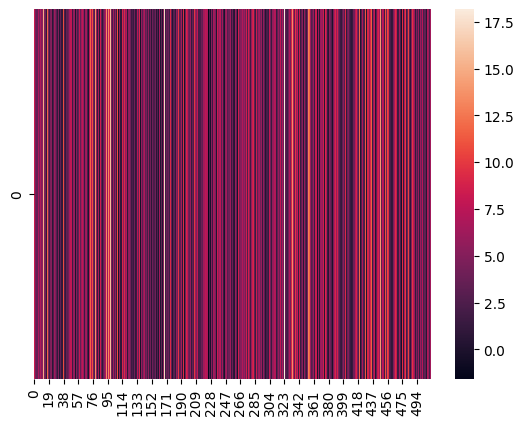

In [93]:
sns.heatmap(b[7][0,:,:,:].reshape(1,512))

##model final new method

In [30]:
np.unique(y)

array(['Dysphonie', 'Funktionelle Dysphonie', 'Healthy',
       'Hyperfunktionelle Dysphonie', 'Laryngitis',
       'Psychogene Dysphonie', 'Rekurrensparese',
       'Spasmodische Dysphonie'], dtype='<U27')

In [31]:
x=basemodel.output
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dense(8,activation="softmax")(x)
model_final=tf.keras.Model(inputs=basemodel.input,outputs=x)

In [67]:
model_final.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_1 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

##Embedding model

In [33]:


Embedding=tf.keras.Model(model_final.input,model_final.layers[-6].output)

In [81]:
grad=tf.keras.Model(model_final.input,outputs=[model_final.layers[4].output,model_final.layers[7].output,model_final.layers[11].output,model_final.layers[14].output,model_final.layers[17].output,model_final.layers[21].output,model_final.layers[25].output,model_final.layers[28].output])

In [ ]:
b=Embedding.predict(X)

124/124 [==============================] - 10s 81ms/step


In [ ]:
b.shape

(3953, 512)

In [ ]:
import re
b=b.astype("float")
for i in b:
  for j in i:
    if not(re.search(r"\d+",str(j).lower())):
      print("**")

## cluster check

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
b = sc.fit_transform(b)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =40)
b_new = pca.fit_transform(b)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

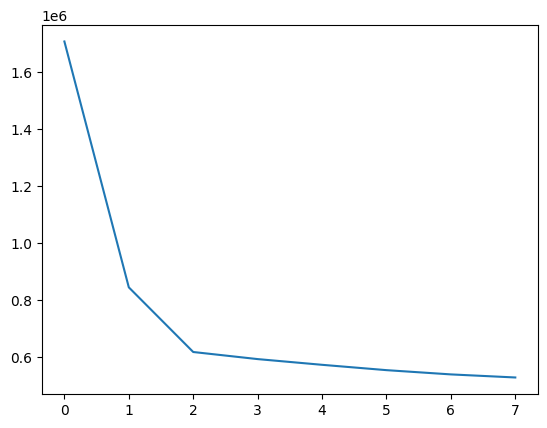

In [ ]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,9):
  kmeans=KMeans(n_clusters=i,init="k-means++")
  kmeans.fit(b_new)
  wcss.append(kmeans.inertia_)
plt.plot(wcss)

In [ ]:
b_new

array([[-1.44279398e+37,  1.33011673e+24, -2.92243368e+22, ...,
         2.87746100e+20, -3.43174172e+21, -1.04855797e+21],
       [-1.44279398e+37,  3.82398633e+21, -1.24919611e+23, ...,
         8.97030418e+22,  3.01721459e+23,  2.73162147e+23],
       [-1.44279398e+37, -5.37982871e+20, -3.88212546e+22, ...,
        -2.94326321e+22, -1.90132192e+23, -1.75772125e+23],
       ...,
       [-1.44279398e+37, -6.00401073e+20,  4.95676706e+21, ...,
        -1.89863629e+19, -7.97943537e+20, -2.71321261e+20],
       [-1.44279398e+37, -6.00401073e+20,  4.95676706e+21, ...,
        -1.89863629e+19, -7.97943537e+20, -2.71321261e+20],
       [-1.44279398e+37, -6.00401073e+20,  4.95676706e+21, ...,
        -1.89863629e+19, -7.97943537e+20, -2.71321261e+20]])

In [ ]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
pred=kmeans.fit_predict(b_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pred

array([2, 3, 3, ..., 2, 2, 1], dtype=int32)

In [ ]:
from collections import Counter

In [ ]:
for i in range(4):
  s=np.unique(y[pred==i],return_counts=True)
  m=np.array([[i,j] for i,j in zip(s[0],s[1])])
  m=m[list(np.argsort(m[:,1].astype("int")))[-1:-8:-1],:]
  print(m)

[[  2 298]
 [  6  92]
 [  4  51]
 [  3  49]
 [  0  30]
 [  1  29]
 [  5  15]]
[[  2 553]
 [  6 135]
 [  3 102]
 [  4  61]
 [  1  58]
 [  0  47]
 [  7  44]]
[[  2 684]
 [  6 170]
 [  3 146]
 [  4  80]
 [  1  78]
 [  0  66]
 [  7  57]]
[[  2 511]
 [  3 143]
 [  6 121]
 [  1  56]
 [  7  53]
 [  0  46]
 [  5  41]]


In [ ]:
s=np.unique(y[pred==3],return_counts=True)
[(i,j) for i,j in zip(s[0],s[1])]

[]

##compile model

In [ ]:
model_final.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

##train test split

In [ ]:
X=X.astype("int")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 ,random_state=42)

In [ ]:
X_test.shape,y_test.shape

((989, 1, 48000), (989,))

##label encoder

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.array(classes))
y=le.transform(y)

In [ ]:
le.classes_


array(['Dysphonie', 'Funktionelle Dysphonie',
       'Hyperfunktionelle Dysphonie', 'Laryngitis',
       'Psychogene Dysphonie', 'Rekurrensparese',
       'Spasmodische Dysphonie'], dtype='<U27')

In [ ]:
y

array([1, 1, 1, ..., 4, 5, 5])

In [ ]:
len(le.classes_)

8

##testing balance

In [ ]:
[len([k for k in y_test if k==m]) for m in set(y_test)]

[44, 47, 517, 114, 52, 36, 143, 36]

##testing train test shape

In [ ]:
X_train.shape,y_train.shape

((1200, 1, 48000), (1200,))

In [ ]:
X_train

array([[[ -3607,  -3986,  -3886, ...,  -2934,  -2765,  -2532]],

       [[ -3506,  -3566,  -3649, ...,      0,      0,      0]],

       [[  1473,   1687,   1884, ...,      0,      0,      0]],

       ...,

       [[ -2719,  -2616,  -2479, ...,      0,      0,      0]],

       [[ -1486,  -1737,  -1791, ...,  10407,  11079,  11738]],

       [[     0,      0,      0, ...,  -8967,  -9557, -10011]]])

In [ ]:
X_test

array([[[-2308, -2816, -2872, ...,  -523,  -114,   292]],

       [[    0,     0,     0, ...,  7329,  6626,  5691]],

       [[ 5295,  6036,  5941, ...,     0,     0,     0]],

       ...,

       [[   93,  -809, -1911, ...,     0,     0,     0]],

       [[    0,     0,     0, ...,  2608,  2860,  3321]],

       [[ 2942,  2099,   782, ...,  4809,  5020,  5163]]])

In [ ]:
y_train

array([5, 2, 5, ..., 1, 1, 1])

In [ ]:
y_test

array([3, 5, 3, 0, 2, 2, 2, 2, 2, 5, 2, 4, 5, 3, 2, 2, 2, 3, 2, 2, 4, 2,
       2, 5, 2, 5, 3, 2, 2, 2, 2, 5, 5, 5, 2, 2, 2, 3, 5, 3, 3, 2, 3, 2,
       3, 4, 2, 2, 5, 2, 4, 2, 2, 3, 2, 2, 1, 2, 2, 2, 5, 5, 2, 2, 2, 3,
       2, 2, 3, 2, 4, 2, 2, 2, 3, 2, 0, 2, 2, 5, 2, 2, 2, 2, 0, 4, 5, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 0, 2, 2, 1, 3, 3, 2, 0,
       2, 3, 2, 2, 3, 1, 2, 3, 3, 3, 2, 3, 5, 2, 2, 3, 2, 4, 5, 2, 2, 2,
       5, 5, 2, 2, 5, 2, 2, 3, 3, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       0, 2, 2, 3, 2, 5, 3, 2, 5, 2, 2, 1, 3, 5, 4, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 3, 2, 5, 2, 2, 5, 5, 1, 4, 2, 2, 5, 2, 2, 2, 2, 4, 2, 4, 5,
       3, 4, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 3, 5, 2, 2, 2, 2, 2, 2, 3, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       5, 5, 2, 5, 2, 3, 2, 5, 3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3,
       3, 4, 1, 1, 5, 1, 3, 2, 2, 0, 3, 5, 0, 2, 2, 5, 2, 2, 5, 3, 2, 2,
       4, 2, 2, 1, 2, 2, 2, 2, 4, 2, 5, 0, 3, 5, 5,

##load save model

In [32]:
model_final.load_weights("/content/drive/MyDrive/SONAR_SVD.h5")

In [ ]:
#model_final.save("/content/drive/MyDrive/SONAR_SVD.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##fit deep model

In [ ]:
for i in basemodel.layers[-7:]:
  i.trainable=True

In [ ]:
model_final.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 128, 199, 64)      640       
                                                                 
 batch_normalization_1 (Bat  (None, 128, 199, 64)      256       
 chNormalization)                                                
                                                           

In [ ]:
model_final.evaluate(X,y)

124/124 [==============================] - 224s 2s/step - loss: 0.2266 - Accuracy: 0.9600


[0.22660593688488007, 0.9600303769111633]

In [ ]:
history=model_final.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=[X_test,y_test])

Epoch 1/50
24/24 [==============================] - 38s 960ms/step - loss: 1.7048 - Accuracy: 0.4700 - val_loss: 1.7081 - val_Accuracy: 0.5541
Epoch 2/50
24/24 [==============================] - 9s 375ms/step - loss: 1.3473 - Accuracy: 0.5607 - val_loss: 1.6751 - val_Accuracy: 0.5389
Epoch 3/50
24/24 [==============================] - 9s 374ms/step - loss: 1.2064 - Accuracy: 0.5985 - val_loss: 1.5733 - val_Accuracy: 0.5592
Epoch 4/50
24/24 [==============================] - 9s 370ms/step - loss: 1.0819 - Accuracy: 0.6366 - val_loss: 1.5807 - val_Accuracy: 0.5228
Epoch 5/50
24/24 [==============================] - 9s 367ms/step - loss: 0.9756 - Accuracy: 0.6835 - val_loss: 1.4927 - val_Accuracy: 0.5480
Epoch 6/50
24/24 [==============================] - 9s 365ms/step - loss: 0.8799 - Accuracy: 0.7095 - val_loss: 1.4202 - val_Accuracy: 0.5541
Epoch 7/50
24/24 [==============================] - 9s 364ms/step - loss: 0.7848 - Accuracy: 0.7389 - val_loss: 1.3522 - val_Accuracy: 0.5774
Epoch

In [ ]:
history1=model_final.fit(X_train,y_train,batch_size=128,epochs=100,initial_epoch=len(history.epoch),validation_data=[X_test,y_test])

Epoch 51/100
24/24 [==============================] - 19s 516ms/step - loss: 2.5388 - Accuracy: 0.4902 - val_loss: 16.6480 - val_Accuracy: 0.5298
Epoch 52/100
24/24 [==============================] - 10s 439ms/step - loss: 1.1900 - Accuracy: 0.6113 - val_loss: 11.9135 - val_Accuracy: 0.5238
Epoch 53/100
24/24 [==============================] - 11s 443ms/step - loss: 0.7640 - Accuracy: 0.7240 - val_loss: 4.6510 - val_Accuracy: 0.5652
Epoch 54/100
24/24 [==============================] - 10s 434ms/step - loss: 0.5141 - Accuracy: 0.8300 - val_loss: 1.9332 - val_Accuracy: 0.6168
Epoch 55/100
24/24 [==============================] - 10s 429ms/step - loss: 0.3490 - Accuracy: 0.8866 - val_loss: 1.2861 - val_Accuracy: 0.6734
Epoch 56/100
24/24 [==============================] - 10s 425ms/step - loss: 0.2980 - Accuracy: 0.9065 - val_loss: 1.5101 - val_Accuracy: 0.6178
Epoch 57/100
24/24 [==============================] - 10s 423ms/step - loss: 0.2522 - Accuracy: 0.9130 - val_loss: 1.2306 - val_

In [ ]:
history2=model_final.fit(X_train,y_train,batch_size=128,epochs=120,initial_epoch=100,validation_data=[X_test,y_test])

Epoch 101/120
24/24 [==============================] - 11s 454ms/step - loss: 0.1638 - Accuracy: 0.9426 - val_loss: 1.0470 - val_Accuracy: 0.7988
Epoch 102/120
24/24 [==============================] - 10s 433ms/step - loss: 0.1148 - Accuracy: 0.9595 - val_loss: 1.2114 - val_Accuracy: 0.7401
Epoch 103/120
24/24 [==============================] - 11s 443ms/step - loss: 0.1460 - Accuracy: 0.9561 - val_loss: 1.8477 - val_Accuracy: 0.6663
Epoch 104/120
24/24 [==============================] - 10s 441ms/step - loss: 0.0660 - Accuracy: 0.9747 - val_loss: 0.9939 - val_Accuracy: 0.8362
Epoch 105/120
24/24 [==============================] - 10s 432ms/step - loss: 0.0556 - Accuracy: 0.9784 - val_loss: 0.8952 - val_Accuracy: 0.8463
Epoch 106/120
24/24 [==============================] - 10s 428ms/step - loss: 0.0530 - Accuracy: 0.9798 - val_loss: 0.8464 - val_Accuracy: 0.8524
Epoch 107/120
24/24 [==============================] - 10s 426ms/step - loss: 0.0478 - Accuracy: 0.9845 - val_loss: 0.8930 -

In [ ]:
history1.history

{'loss': [2.5387909412384033,
  1.1899679899215698,
  0.7639975547790527,
  0.5141370296478271,
  0.3489839434623718,
  0.29796019196510315,
  0.2522445023059845,
  0.1748759001493454,
  0.14895829558372498,
  0.11494269967079163,
  0.10665546357631683,
  0.14567461609840393,
  0.1843465119600296,
  0.18755562603473663,
  0.1664423942565918,
  0.17103531956672668,
  0.1676180213689804,
  0.12547385692596436,
  0.10176592320203781,
  0.09071210026741028,
  0.08266399800777435,
  0.08088372647762299,
  0.07661382108926773,
  0.059026915580034256,
  0.0521065816283226,
  0.04636409878730774,
  0.046544741839170456,
  0.04170547053217888,
  0.044815726578235626,
  0.04031065106391907,
  0.03697894886136055,
  0.040897272527217865,
  0.05633830279111862,
  0.06800142675638199,
  0.06582867354154587,
  0.07188764214515686,
  0.06538663804531097,
  0.07065106928348541,
  0.09951606392860413,
  0.11469762772321701,
  0.11461895704269409,
  0.09706065058708191,
  0.07237706333398819,
  0.059215

In [ ]:
import matplotlib.pyplot as plt

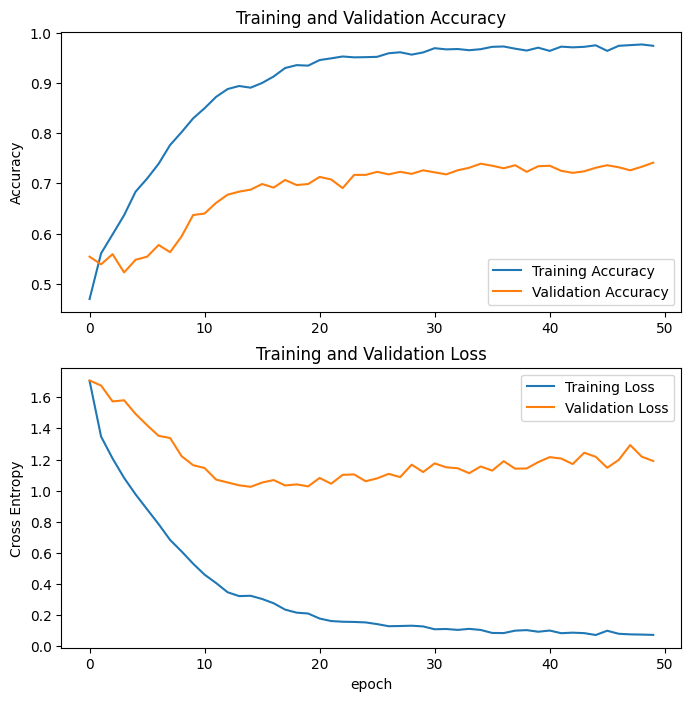

In [ ]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc += history1.history['Accuracy']
val_acc += history1.history['val_Accuracy']
acc += history2.history['Accuracy']
val_acc += history2.history['val_Accuracy']
loss += history1.history['loss']
val_loss += history1.history['val_loss']
loss += history2.history['loss']
val_loss += history2.history['val_loss']

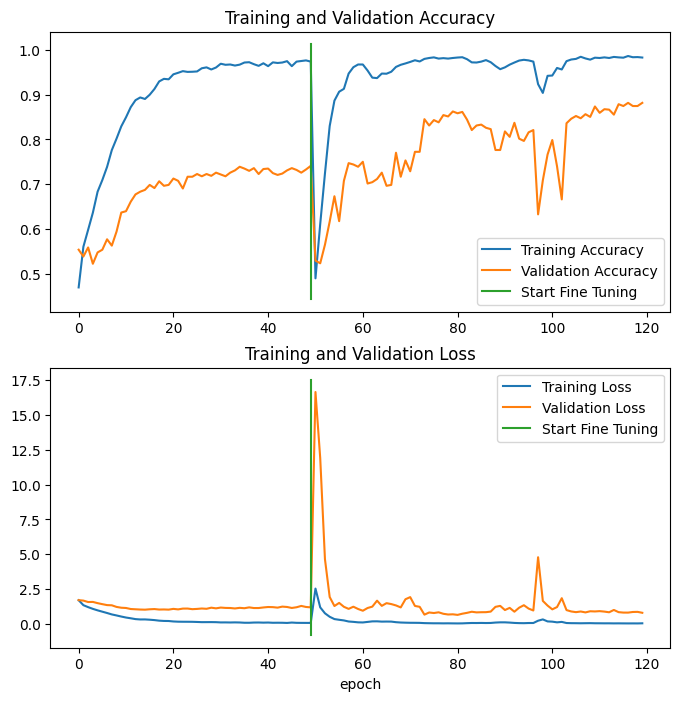

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


##evaluation

In [ ]:
model_final.evaluate(X_test,y_test)

31/31 [==============================] - 2s 68ms/step - loss: 0.8003 - Accuracy: 0.8817


[0.8003316521644592, 0.8816986680030823]

In [ ]:
model_final.evaluate(X_test,y_test)

28/28 [==============================] - 1s 20ms/step - loss: 1.7018 - accuracy: 0.7436


[1.7017924785614014, 0.7436489462852478]

In [ ]:
model_final.evaluate(X_test,y_test)

28/28 [==============================] - 1s 19ms/step - loss: 1.6502 - accuracy: 0.7737


[1.6502430438995361, 0.7736720442771912]

##prediction

In [ ]:
le.classes_,classes

(array(['Dysphonie', 'Funktionelle Dysphonie', 'Healthy',
        'Hyperfunktionelle Dysphonie', 'Laryngitis',
        'Psychogene Dysphonie', 'Rekurrensparese',
        'Spasmodische Dysphonie'], dtype='<U27'),
 ['Dysphonie',
  'Funktionelle Dysphonie',
  'Healthy',
  'Hyperfunktionelle Dysphonie',
  'Laryngitis',
  'Psychogene Dysphonie',
  'Rekurrensparese',
  'Spasmodische Dysphonie'])

In [ ]:
f=model_final.predict(X)

7/7 [==============================] - 9s 1s/step


In [ ]:
f.shape

(214, 8)

In [ ]:
len(IDs_all)

214

<Axes: >

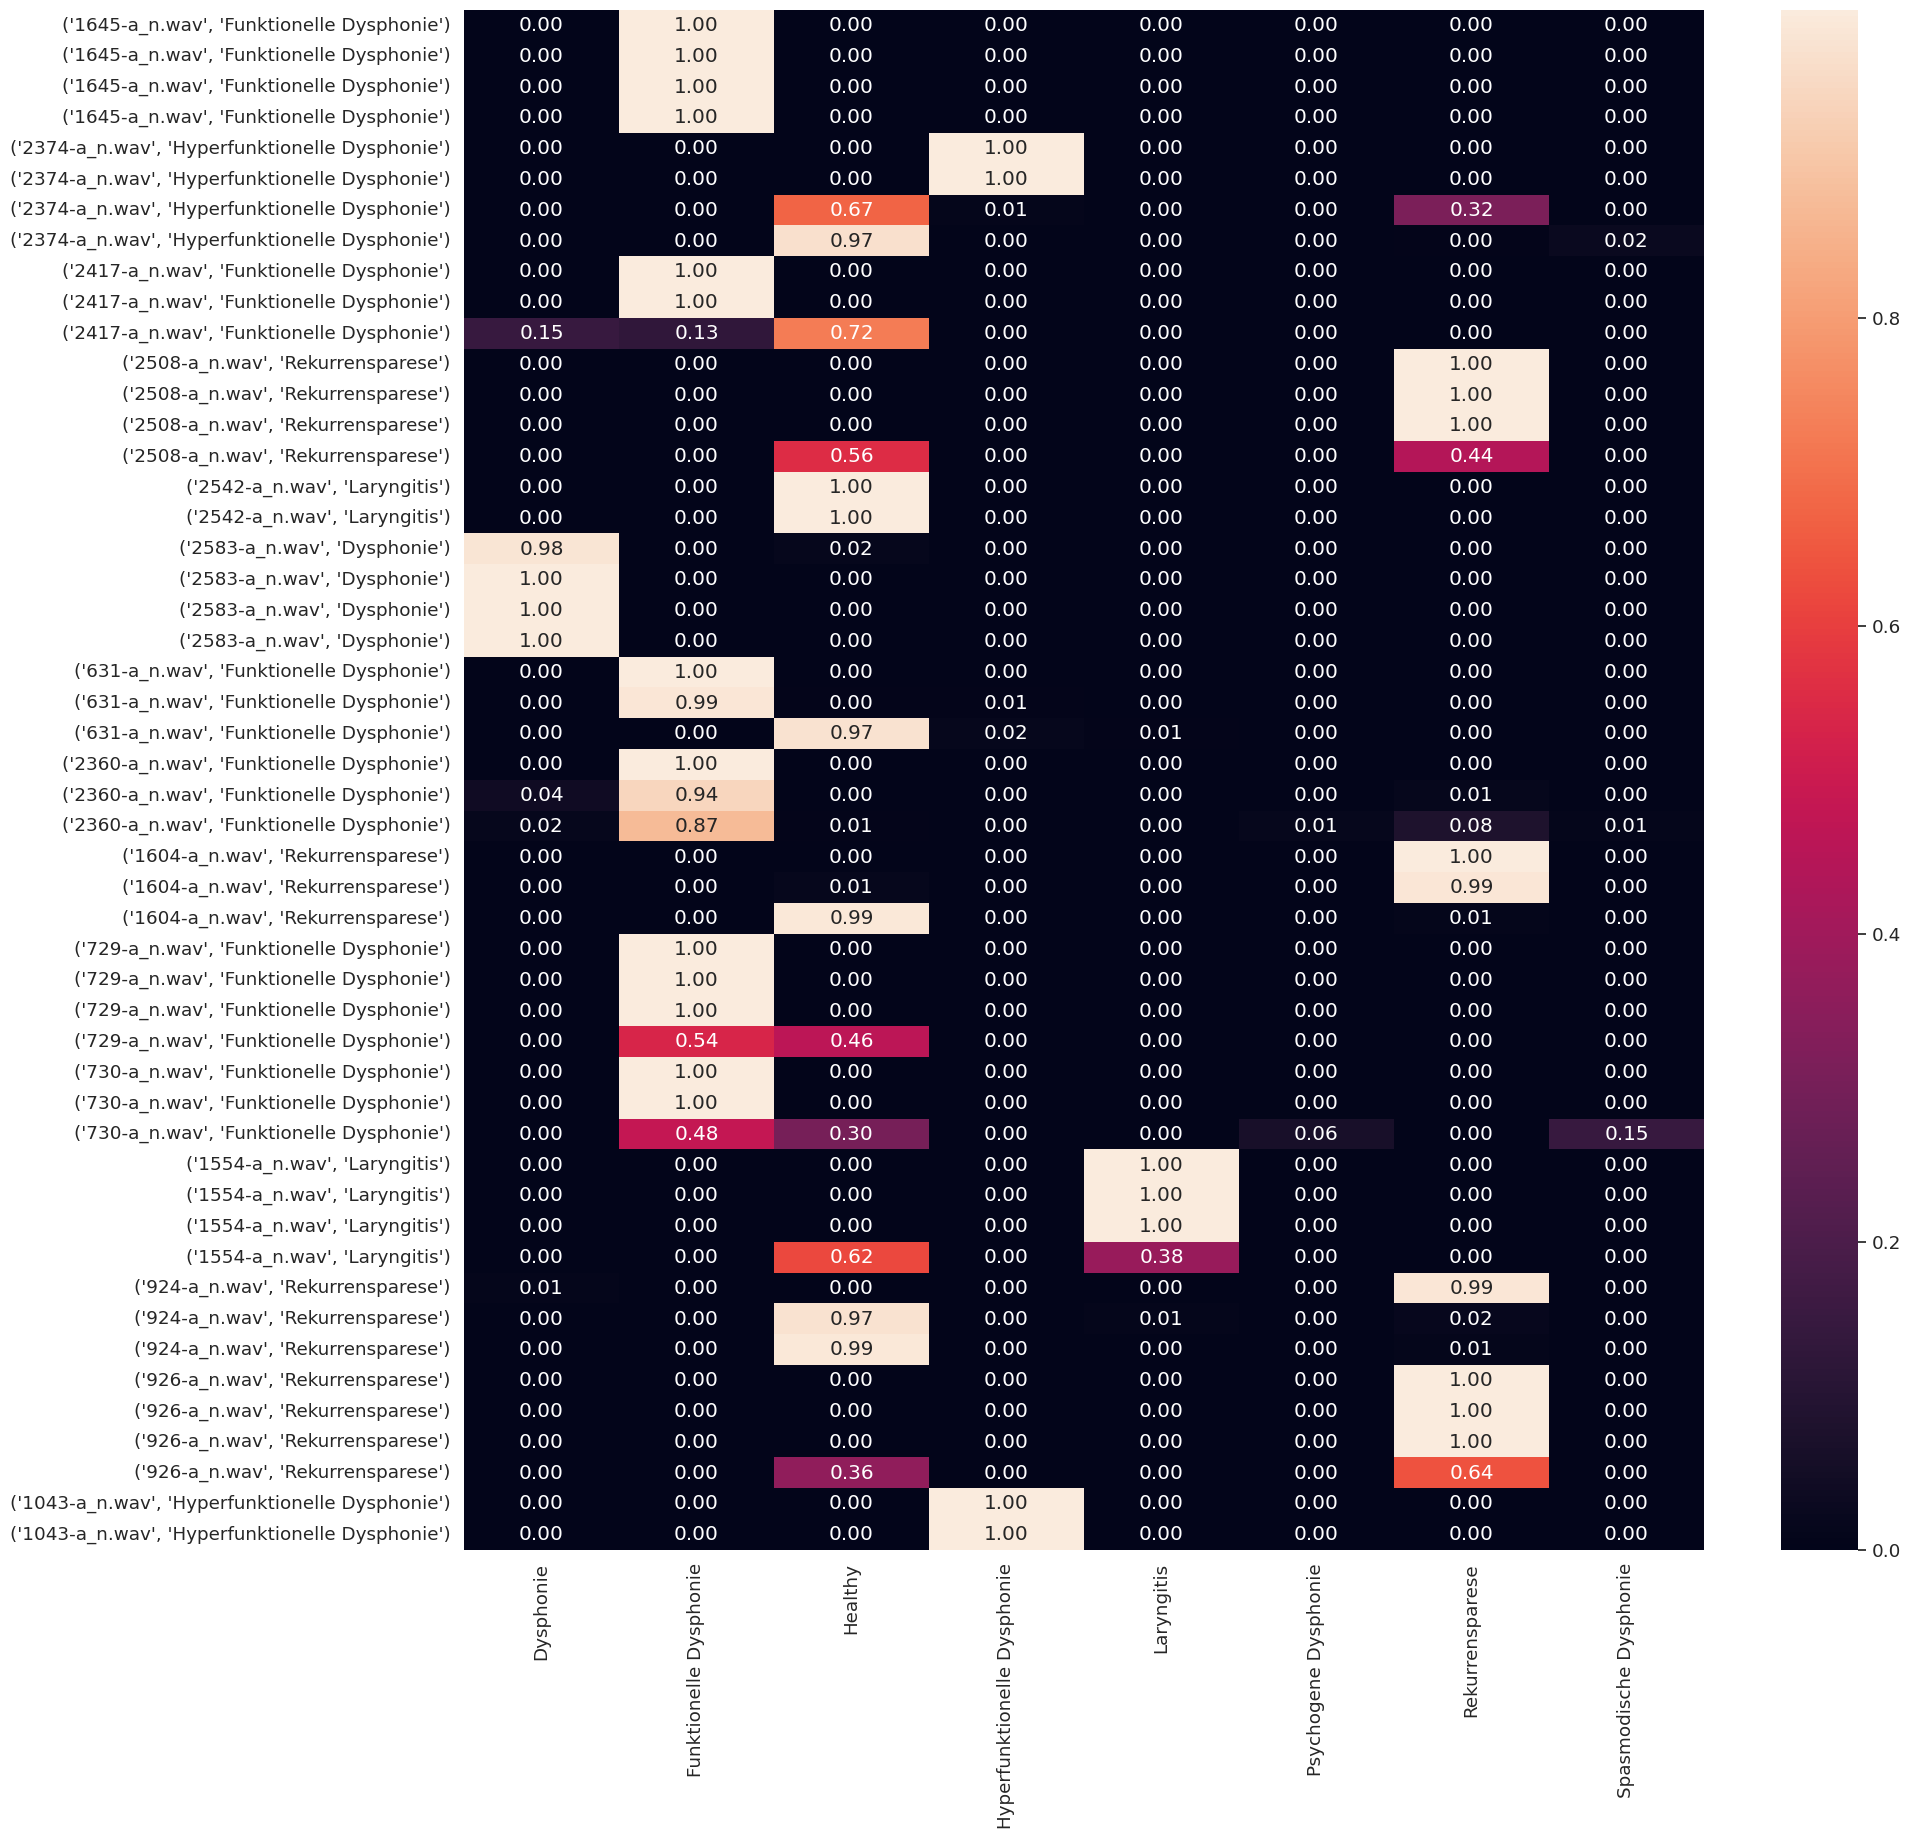

In [ ]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)
plt.subplots(figsize=(20,20))

sns.heatmap(f[:50,:],xticklabels=le.classes_,yticklabels=[i for i in zip(IDs_all[:100],le.inverse_transform(y[:50]))],annot=True,fmt=".2f")

In [ ]:
len(X),len(y)

(214, 214)

In [ ]:
model_final.evaluate(X,y)

7/7 [==============================] - 8s 1s/step - loss: 1.8654 - Accuracy: 0.7523


[1.8653992414474487, 0.7523364424705505]

In [ ]:
a=Embedding.predict(X_test)

30/30 [==============================] - 1s 35ms/step


In [ ]:
a

array([[1.6554631 , 0.6311464 , 2.0406234 , ..., 2.798424  , 0.95339304,
        3.5003533 ],
       [2.6852698 , 0.42091972, 2.222858  , ..., 2.4510043 , 1.1658356 ,
        5.342297  ],
       [2.8662343 , 0.29546207, 3.1842413 , ..., 3.2059853 , 1.4798825 ,
        6.3381696 ],
       ...,
       [2.4692318 , 0.73036945, 3.0294034 , ..., 2.75762   , 1.3977853 ,
        6.4046054 ],
       [1.3210243 , 0.598609  , 2.172058  , ..., 2.136596  , 0.4170838 ,
        3.8947325 ],
       [2.2167504 , 0.7695794 , 2.359442  , ..., 2.2416062 , 1.33404   ,
        4.7137656 ]], dtype=float32)

##new model method

In [ ]:
mel_Input=[basemodel.layers[i] for i in range(3)]

In [ ]:
mel_Input[2].weights

[<tf.Variable 'batch_normalization/gamma:0' shape=(1,) dtype=float32, numpy=array([1.1132184], dtype=float32)>,
 <tf.Variable 'batch_normalization/beta:0' shape=(1,) dtype=float32, numpy=array([0.00407847], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_mean:0' shape=(1,) dtype=float32, numpy=array([-25.361977], dtype=float32)>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(1,) dtype=float32, numpy=array([191.97818], dtype=float32)>]

In [ ]:
layer_1=[basemodel.layers[i] for i in range(3,10)]

In [ ]:
layer_2=[basemodel.layers[i] for i in range(10,17)]

In [ ]:
layer_3=[basemodel.layers[i] for i in range(17,24)]

In [ ]:
layer_4=[basemodel.layers[i] for i in range(24,30)]

In [ ]:
layer1=tf.keras.Sequential(layer_1)
layer2=tf.keras.Sequential(layer_2)
layer3=tf.keras.Sequential(layer_3)
layer4=tf.keras.Sequential(layer_4)
mel_input=tf.keras.Sequential(mel_Input)

In [ ]:
x=mel_input.output
x=layer1(x)
x=layer2(x)
x=layer3(x)
x=layer4(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dense(7,activation="softmax")(x)
model_final=tf.keras.Model(inputs=mel_input.input,outputs=x)

In [ ]:
layer4.trainable=True

In [ ]:
model_final.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 48000)]        0         
                                                                 
 melspectrogram (Sequential  (None, 128, 199, 1)       0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128, 199, 1)       4         
 Normalization)                                                  
                                                                 
 sequential_4 (Sequential)   (None, 64, 99, 64)        38080     
                                                                 
 sequential_5 (Sequential)   (None, 32, 49, 128)       222464    
                                                                 
 sequential_6 (Sequential)   (None, 16, 24, 256)       8872

In [ ]:
x=mel_input.output
x=layer1(x)
x=layer2(x)
x=layer3(x)
x=layer4(x)
Embedding=tf.keras.Model(inputs=mel_input.input,outputs=x)

In [ ]:
from keras.optimizers.legacy import SGD

In [ ]:

model_final.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#sgd = SGD(lr=0.01, momentum=0.5, decay=0.001, nesterov=False)
#model_final.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model_final.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model_final.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=[X_test,y_test])

Epoch 1/50
16/16 [==============================] - 30s 928ms/step - loss: 1.5764 - accuracy: 0.5133 - val_loss: 2.0799 - val_accuracy: 0.5046
Epoch 2/50
16/16 [==============================] - 6s 367ms/step - loss: 1.3660 - accuracy: 0.5597 - val_loss: 1.8798 - val_accuracy: 0.5000
Epoch 3/50
16/16 [==============================] - 6s 371ms/step - loss: 1.2498 - accuracy: 0.5878 - val_loss: 1.6020 - val_accuracy: 0.5245
Epoch 4/50
16/16 [==============================] - 6s 375ms/step - loss: 1.2107 - accuracy: 0.6036 - val_loss: 1.4947 - val_accuracy: 0.5413
Epoch 5/50
16/16 [==============================] - 6s 376ms/step - loss: 1.1462 - accuracy: 0.6143 - val_loss: 1.4833 - val_accuracy: 0.5489
Epoch 6/50
16/16 [==============================] - 6s 373ms/step - loss: 1.0851 - accuracy: 0.6337 - val_loss: 1.4409 - val_accuracy: 0.5581
Epoch 7/50
16/16 [==============================] - 6s 370ms/step - loss: 1.0201 - accuracy: 0.6495 - val_loss: 1.4103 - val_accuracy: 0.5612
Epoch

In [ ]:
history1=model_final.fit(X_train,y_train,batch_size=128,epochs=100,initial_epoch=len(history.epoch),validation_data=[X_test,y_test])

Epoch 51/100
16/16 [==============================] - 16s 584ms/step - loss: 2.5256 - accuracy: 0.5199 - val_loss: 46.8018 - val_accuracy: 0.5000
Epoch 52/100
16/16 [==============================] - 7s 438ms/step - loss: 1.2692 - accuracy: 0.6082 - val_loss: 24.0055 - val_accuracy: 0.5015
Epoch 53/100
16/16 [==============================] - 7s 442ms/step - loss: 0.9178 - accuracy: 0.6821 - val_loss: 10.1365 - val_accuracy: 0.5275
Epoch 54/100
16/16 [==============================] - 7s 441ms/step - loss: 0.6917 - accuracy: 0.7577 - val_loss: 7.9442 - val_accuracy: 0.5229
Epoch 55/100
16/16 [==============================] - 7s 436ms/step - loss: 0.5088 - accuracy: 0.8245 - val_loss: 5.4132 - val_accuracy: 0.5306
Epoch 56/100
16/16 [==============================] - 7s 432ms/step - loss: 0.4083 - accuracy: 0.8587 - val_loss: 2.8289 - val_accuracy: 0.5963
Epoch 57/100
16/16 [==============================] - 7s 429ms/step - loss: 0.3541 - accuracy: 0.8867 - val_loss: 2.9470 - val_accur

KeyboardInterrupt: 

In [ ]:
history2=model_final.fit(X_train,y_train,batch_size=128,epochs=125,initial_epoch=len(history1.epoch),validation_data=[X_test,y_test])

Epoch 51/125
27/27 [==============================] - 15s 574ms/step - loss: 0.1629 - accuracy: 0.9381 - val_loss: 0.7939 - val_accuracy: 0.7984
Epoch 52/125
27/27 [==============================] - 15s 560ms/step - loss: 0.1830 - accuracy: 0.9284 - val_loss: 0.9915 - val_accuracy: 0.7562
Epoch 53/125
27/27 [==============================] - 15s 561ms/step - loss: 0.1511 - accuracy: 0.9451 - val_loss: 0.7682 - val_accuracy: 0.8107
Epoch 54/125
27/27 [==============================] - 15s 559ms/step - loss: 0.1527 - accuracy: 0.9442 - val_loss: 0.8803 - val_accuracy: 0.7764
Epoch 55/125
27/27 [==============================] - 15s 556ms/step - loss: 0.2234 - accuracy: 0.9166 - val_loss: 0.7110 - val_accuracy: 0.7746
Epoch 56/125
27/27 [==============================] - 15s 556ms/step - loss: 0.2097 - accuracy: 0.9254 - val_loss: 1.6538 - val_accuracy: 0.5669
Epoch 57/125
27/27 [==============================] - 15s 556ms/step - loss: 0.1503 - accuracy: 0.9433 - val_loss: 0.6934 - val_ac

In [ ]:
history3=model_final.fit(X_train,y_train,batch_size=128,epochs=150,initial_epoch=125,validation_data=[X_test,y_test])

Epoch 126/150
27/27 [==============================] - 15s 569ms/step - loss: 0.0989 - accuracy: 0.9615 - val_loss: 0.9479 - val_accuracy: 0.8442
Epoch 127/150
27/27 [==============================] - 15s 559ms/step - loss: 0.1026 - accuracy: 0.9618 - val_loss: 1.8666 - val_accuracy: 0.7544
Epoch 128/150
27/27 [==============================] - 15s 561ms/step - loss: 0.1169 - accuracy: 0.9563 - val_loss: 1.0179 - val_accuracy: 0.8107
Epoch 129/150
27/27 [==============================] - 15s 558ms/step - loss: 0.1582 - accuracy: 0.9457 - val_loss: 1.6289 - val_accuracy: 0.7306
Epoch 130/150
27/27 [==============================] - 15s 555ms/step - loss: 0.2046 - accuracy: 0.9304 - val_loss: 1.1558 - val_accuracy: 0.7280
Epoch 131/150
27/27 [==============================] - 15s 555ms/step - loss: 0.1735 - accuracy: 0.9445 - val_loss: 2.8624 - val_accuracy: 0.5202
Epoch 132/150
27/27 [==============================] - 15s 555ms/step - loss: 0.1769 - accuracy: 0.9413 - val_loss: 2.1140 -

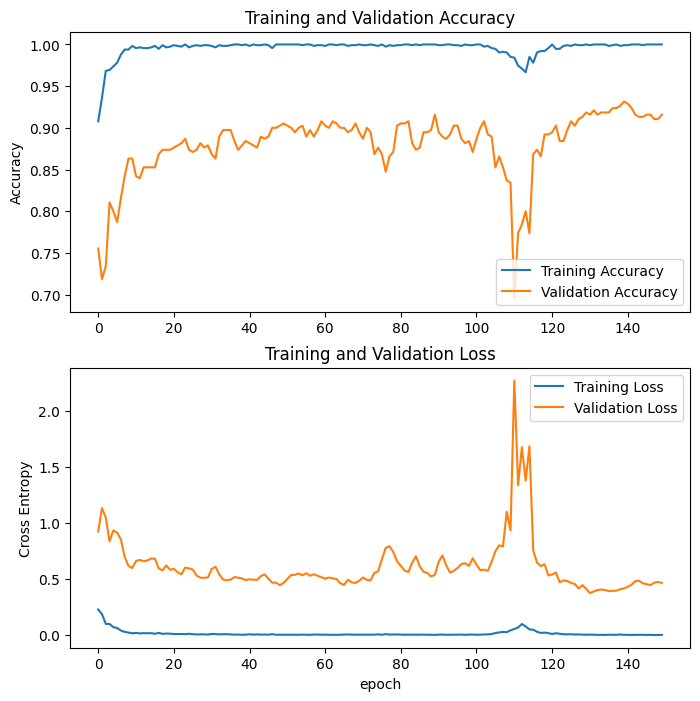

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
acc += history1.history['accuracy']
val_acc += history1.history['val_accuracy']

loss += history1.history['loss']
val_loss += history1.history['val_loss']

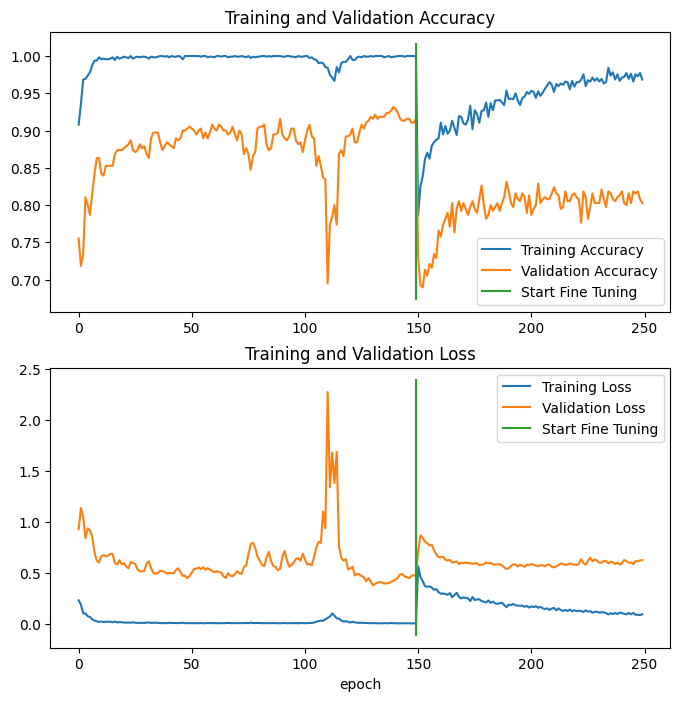

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.plot([len(history.epoch)-1,len(history.epoch)-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


##saving features

In [ ]:
a=Embedding.predict(X)

7/7 [==============================] - 9s 1s/step


In [ ]:
le.inverse_transform(y_train)

array(['Healthy', 'Healthy', 'Laryngitis', ..., 'Laryngitis', 'Healthy',
       'Rekurrensparese'], dtype='<U77')

In [ ]:
q= ["label","IDs"]
q.extend([f"feature{i}" for i in range(1,513)])
d=pd.DataFrame(np.column_stack([np.array(le.inverse_transform(y)).reshape(-1,1),IDs_all,a]),columns=q)

In [ ]:
d

,label,IDs,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,Funktionelle Dysphonie,1645-a_n.wav,13.004595,7.357682,9.458172,22.8666,14.013183,3.1656132,7.0245647,14.467049,...,9.871321,9.311246,4.2522125,9.857244,9.168243,17.04617,6.7563195,8.307287,13.061116,17.937212
1,Funktionelle Dysphonie,1645-a_n.wav,4.000901,7.208157,9.557909,6.4091783,2.9524474,3.1209867,7.0551343,6.2180047,...,2.7267592,3.2117968,6.120549,3.1400778,2.2726874,5.867753,6.7387795,8.173677,2.8536165,8.008532
2,Funktionelle Dysphonie,1645-a_n.wav,2.003121,5.8415904,7.673476,4.121194,2.3249261,2.4543295,6.8533006,5.4617047,...,2.2130973,2.7252522,4.5230703,3.3500366,1.0383077,5.9506865,6.974346,7.958704,3.098846,6.643157
3,Funktionelle Dysphonie,1645-a_n.wav,31.976688,4.595203,7.542384,46.990482,27.015938,2.4812353,5.0089827,36.311493,...,33.739952,29.233364,4.1539683,9.915912,20.476576,34.799736,6.341011,7.299459,28.43517,47.003334
4,Hyperfunktionelle Dysphonie,2374-a_n.wav,11.792744,3.5705876,3.6210067,20.87481,11.597006,3.319057,5.6746974,12.925048,...,9.871321,9.943513,6.102255,9.855542,9.168243,15.402529,5.6415772,5.844557,13.061116,13.3916025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Dysphonie,1276-a_n.wav,1.9740467,6.265904,5.510894,4.6124554,5.366931,6.3608336,3.0975196,4.766269,...,2.656621,1.8792439,4.0993204,3.8929663,2.0215135,5.7585087,6.828397,5.818945,2.8526483,8.2821245
210,Dysphonie,1276-a_n.wav,1.8955685,6.247711,5.522656,4.529764,3.4809299,4.447309,2.904445,4.914924,...,1.9257163,1.9218549,3.764877,3.2119384,1.4052029,5.174009,5.3026037,5.737208,2.9060178,7.4657636
211,Dysphonie,1276-a_n.wav,31.972055,4.482041,4.955499,47.194183,26.276516,4.1471562,1.9255656,35.728165,...,33.460842,28.88726,6.860549,3.7536256,19.609512,34.331844,3.8311238,5.8213177,28.491547,46.167164
212,Psychogene Dysphonie,2275-a_n.wav,10.522754,9.776454,4.4898667,13.675988,6.966818,1.5992374,3.9995053,10.215014,...,9.871321,5.4150143,1.8816808,9.85448,9.168243,11.802912,-0.32739255,2.990881,13.061116,11.456654


In [ ]:
d.to_csv("/content/drive/MyDrive/confused_with_IDs.csv")